# Homework 7- Forecasting Stock Data

In this homework, we will work with stock data. Python has a built in function that will pull stock data from Yahoo Finance, how cool!

First, you need to install yfinance:

In [1]:
# you may need to run this in the anaconda prompt
# in anaconda, open powershell prompt
# type in the following
# on a mac use pip3 instead of pip

!pip install yfinance

In [2]:
import yfinance as yf
import pandas as pd 
pd.options.display.float_format = '{:,.2f}'.format

## Importing Stock Data Directly from the Internet

```python

name = yf.Ticker("stock_code")
```

Where ``stock_code`` is a stock's stock exchange trading acronym. This code will return a reference to all of that Company's data stored on yahoo finance.

To access various data for that company we can use:

```python

# general information
name.info

# stock data as pandas dataframe
name.history(period='1mo', interval='1d', start=None, end=None)
```

Where:
- ``period`` is the length of time you want data for 
    - Valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max

- ``interval`` how often stock price data is calculated
    - Valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
      
- ``start`` instead of providing a period, you can provide start and end dates
    - start date string YYYY-MM-DD
- ``end`` Default is now. If do not enter this argument, you will receive 1 month of data ending today

Interestingly, you can also pull limited financial statement information from Yahoo Finance:

```python
# income statement items
name.financials

# balance sheet
name.balance_sheet

# cash flows
name.cashflow

# sustainability data
name.sustainability
```

You can read more here: https://github.com/ranaroussi/yfinance

<font color='blue' size = '5'> Task 1 </font>

For now, pull Coca Cola's Yahoo Finance data using ticker KO. Then:

1. Look at Coke's info, peruse what information is given
2. Pull 5 years worth of daily stock values ending 11/1/2022. Name this dataframe so that you can access it in the future
4. Run the following code to remove timezone from the index ``df.index = df.index.tz_localize(None)``
3. Reset the index so that date is a column instead of the index


**Note** Yahoo finance's stock price data adjusts backwards for stock splits. This keeps the data comparable over time. I don't think that Coke has done any stock splits in the recent past.

In [3]:
#1
CocaCola = yf.Ticker("KO")

In [4]:
#1 
CocaCola.info

{'zip': '30313',
 'sector': 'Consumer Defensive',
 'fullTimeEmployees': 79000,
 'longBusinessSummary': 'The Coca-Cola Company, a beverage company, manufactures, markets, and sells various nonalcoholic beverages worldwide. The company provides sparkling soft drinks; flavored and enhanced water, and sports drinks; juice, dairy, and plant\x96based beverages; tea and coffee; and energy drinks. It also offers beverage concentrates and syrups, as well as fountain syrups to fountain retailers, such as restaurants and convenience stores. The company sells its products under the Coca-Cola, Diet Coke/Coca-Cola Light, Coca-Cola Zero Sugar, Fanta, Fresca, Schweppes, Sprite, Thums Up, Aquarius, Ciel, dogadan, Dasani, glacéau smartwater, glacéau vitaminwater, Ice Dew, I LOHAS, Powerade, Topo Chico, AdeS, Del Valle, fairlife, innocent, Minute Maid, Minute Maid Pulpy, Simply, Ayataka, BODYARMOR, Costa, FUZE TEA, Georgia, and Gold Peak brands. It operates through a network of independent bottling partn

In [5]:
#2
coke = CocaCola.history(period='5y', interval='1d', start='2017-10-26', end='2022-11-02')
coke

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-10-26 00:00:00-04:00,39.47,39.83,39.38,39.39,10569100,0.00,0
2017-10-27 00:00:00-04:00,39.30,39.47,39.12,39.25,9988000,0.00,0
2017-10-30 00:00:00-04:00,39.19,39.25,39.04,39.07,7201900,0.00,0
2017-10-31 00:00:00-04:00,39.13,39.34,39.06,39.18,6560500,0.00,0
2017-11-01 00:00:00-04:00,38.98,39.27,38.88,39.02,7067600,0.00,0
...,...,...,...,...,...,...,...
2022-10-26 00:00:00-04:00,59.01,59.78,58.86,59.39,15831400,0.00,0
2022-10-27 00:00:00-04:00,59.77,59.84,59.38,59.53,16026100,0.00,0
2022-10-28 00:00:00-04:00,59.57,60.91,59.47,60.76,12888900,0.00,0


In [6]:
#3 
coke.index = coke.index.tz_localize(None)

In [7]:
#4 Reset the index so that date is a column instead of the index
coke.reset_index(inplace=True)
coke

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-10-26,39.47,39.83,39.38,39.39,10569100,0.00,0
1,2017-10-27,39.30,39.47,39.12,39.25,9988000,0.00,0
2,2017-10-30,39.19,39.25,39.04,39.07,7201900,0.00,0
3,2017-10-31,39.13,39.34,39.06,39.18,6560500,0.00,0
4,2017-11-01,38.98,39.27,38.88,39.02,7067600,0.00,0
...,...,...,...,...,...,...,...,...
1258,2022-10-26,59.01,59.78,58.86,59.39,15831400,0.00,0
1259,2022-10-27,59.77,59.84,59.38,59.53,16026100,0.00,0
1260,2022-10-28,59.57,60.91,59.47,60.76,12888900,0.00,0
1261,2022-10-31,60.51,60.57,59.67,59.85,14016400,0.00,0


<font color='blue' size = '5'> Task 2 </font>

Import your standard graphing libraries.

Use a seaborn relplot to plot Coke’s closing stock price over the last 5 years (the data you have). Set the size of the dots to equal the volume of trades divided by 1 million. Make sure the visualization is wide enough.

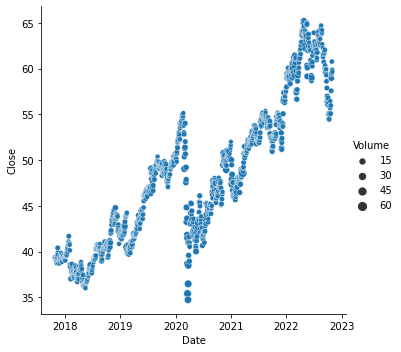

In [8]:
import seaborn as sns

size = coke['Volume']/1000000
sns.relplot(x= 'Date', y='Close', data= coke, kind = 'scatter', size= size)

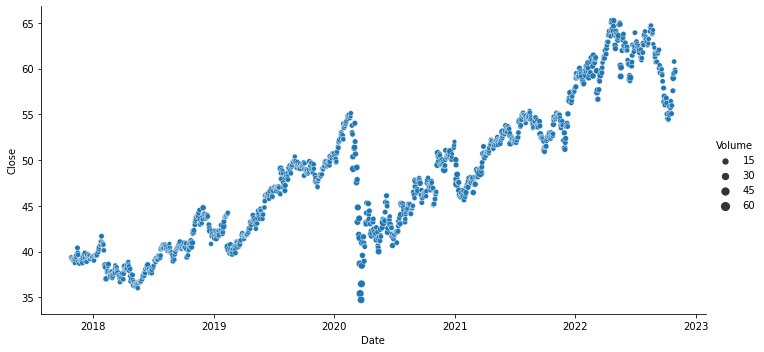

In [9]:
sns.relplot(x= 'Date', y='Close', data= coke, kind = 'scatter', size= size, height = 5, aspect = 2)

<font color='blue' size = '5'> Task 3 </font>

Create a column that counts the number of days from your first observation of Coke's stock price to each observation. Note that we do not have data for stock price on weekends or holidays. Think through if that should affect your count or not. **Make a note of your decision.**

Then, run a regression of stock price on time.

In [30]:
coke['number_of_days'] = coke['Date'] - coke['Date'][0]

In [11]:
number_of_days = coke.index
coke['number_of_days'] = number_of_days
coke

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,number_of_days
0,2017-10-26,39.47,39.83,39.38,39.39,10569100,0.00,0,0
1,2017-10-27,39.30,39.47,39.12,39.25,9988000,0.00,0,1
2,2017-10-30,39.19,39.25,39.04,39.07,7201900,0.00,0,2
3,2017-10-31,39.13,39.34,39.06,39.18,6560500,0.00,0,3
4,2017-11-01,38.98,39.27,38.88,39.02,7067600,0.00,0,4
...,...,...,...,...,...,...,...,...,...
1258,2022-10-26,59.01,59.78,58.86,59.39,15831400,0.00,0,1258
1259,2022-10-27,59.77,59.84,59.38,59.53,16026100,0.00,0,1259
1260,2022-10-28,59.57,60.91,59.47,60.76,12888900,0.00,0,1260
1261,2022-10-31,60.51,60.57,59.67,59.85,14016400,0.00,0,1261


In [12]:
import statsmodels.formula.api as smf

model = smf.ols('Close ~ number_of_days', data = coke).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       0.807
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     5287.
Date:                Sun, 06 Nov 2022   Prob (F-statistic):               0.00
Time:                        21:06:35   Log-Likelihood:                -3315.0
No. Observations:                1263   AIC:                             6634.
Df Residuals:                    1261   BIC:                             6644.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         36.3972      0.188    193.638      0.000      36.028      36.766
number_of_days     0.0188      0.000     72.712      0.000       0.018       0.019
==============================================================================
Omnibus:                       11.264   Durbin-Watson:                   0.037
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.413
Skew:                          -0.222   Prob(JB):                      0.00332
Kurtosis:                       2.857   Cond. No.                     1.46e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

<font color='red' size = '5'> Question 1 </font>

How do you interpret your output? Specifically, how you interpret the coefficients? Do they make sense to you?

By looking at the regression model and the graph, for the past 5 years, Coke's stock price started from 36.47 and it is increasing 0.0188 per day.
However, this doesn't explain the dips in the graph (e.g 2020, 2022). So, we would have to predict coke's actual stock price by using data we don't have yet in the next upcoming questions.

<font color='blue' size = '5'> Task 4 </font>

In a perfect stock market, stock price changes over a long period of time will reflect investor's expected return. However, on a day to day basis, stock price should not be predictable. This is because stock price should fully incorporate all information as soon as the information is publicly available. Future stock price changes will only reflect new information and thus should not be predictable. However for the sake of practice, lets try to forecast Coke's future stock price. 

First, build a forecast model that assumes there is no seasonality in the data but that there is a trend. Fit the model and display its results.

In [97]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [98]:
variable = 'Close'

In [100]:
# simple exponential smoothning needed to optimize alpha

# fit an SES model and view results
sesmodel = SimpleExpSmoothing(coke_original[variable]).fit()


sesmodel.summary()
# In between 0 and 1, 97% is a permanent shift up or down and 3% is random fluctuation
# The SES model predicts that if we have all of the observations available, there would be a demand of 39.3

Dep. Variable:,Close,No. Observations:,1263
Model:,SimpleExpSmoothing,SSE,525.424
Optimized:,True,AIC,-1103.702
Trend:,None,BIC,-1093.419
Seasonal:,None,AICC,-1103.670
Seasonal Periods:,None,Date:,"Mon, 07 Nov 2022"
Box-Cox:,False,Time:,10:00:31
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.9782838,alpha,True
initial_level,39.386120,l.0,True


In [104]:
# save result for graphing later

alpha = sesmodel.params['smoothing_level']
alpha

0.9782838188860964

In [103]:
# another way to quickly calculate forecasted values
# from an optimized SES model

coke['forecast_ses'] = sesmodel.fittedvalues

# we didn't used outersample yet, so no need to forecast out of sample in the next question

<font color='red' size = '5'> Question 2 </font>

Use coding to predict Coke's stock price over the upcoming week. 

Is price expected to go up or down? Interpret in the context of what stock price has been doing lately.

In [15]:
coke.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,number_of_days
1258,2022-10-26,59.01,59.78,58.86,59.39,15831400,0.00,0,1258
1259,2022-10-27,59.77,59.84,59.38,59.53,16026100,0.00,0,1259
1260,2022-10-28,59.57,60.91,59.47,60.76,12888900,0.00,0,1260
1261,2022-10-31,60.51,60.57,59.67,59.85,14016400,0.00,0,1261
1262,2022-11-01,60.03,60.29,59.37,59.64,10659500,0.00,0,1262


In [16]:
# add 5 number_of_days (it ended at 'number_of_days': 1262) to calculate forecast out of sample
extra = pd.DataFrame({'number_of_days' : [1258, 1259, 1260, 1261, 1262]})

extra

,number_of_days
0,1258
1,1259
2,1260
3,1261
4,1262


In [17]:
# append it to our existing 'coke' dataframe
coke = coke.append(extra, ignore_index=True)

coke.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,number_of_days
1263,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1258
1264,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1259
1265,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1260
1266,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1261
1267,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1262


In [54]:
# create and run model
# holt needed to optimize beta
desmodel = Holt(coke[variable]).fit()

desmodel.summary()

/Users/silvialee/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/holtwinters/model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


Dep. Variable:,Close,No. Observations:,1268
Model:,Holt,SSE,nan
Optimized:,True,AIC,nan
Trend:,Additive,BIC,nan
Seasonal:,None,AICC,nan
Seasonal Periods:,None,Date:,"Mon, 07 Nov 2022"
Box-Cox:,False,Time:,08:30:18
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.0050000,alpha,True
smoothing_trend,0.0001,beta,True


In [19]:
# calculate 
coke['des_forecast'] = desmodel.fittedvalues

# out of sample forecast
coke['des_forecast'].fillna(desmodel.forecast(5), inplace=True)
coke.head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,number_of_days,des_forecast
0,2017-10-26,39.47,39.83,39.38,39.39,"10,569,100.00",0.00,0.00,0,39.39
1,2017-10-27,39.30,39.47,39.12,39.25,"9,988,000.00",0.00,0.00,1,39.41
2,2017-10-30,39.19,39.25,39.04,39.07,"7,201,900.00",0.00,0.00,2,39.27
3,2017-10-31,39.13,39.34,39.06,39.18,"6,560,500.00",0.00,0.00,3,39.09
4,2017-11-01,38.98,39.27,38.88,39.02,"7,067,600.00",0.00,0.00,4,39.19
5,2017-11-02,39.03,39.15,38.98,39.09,"8,317,800.00",0.00,0.00,5,39.04
6,2017-11-03,39.17,39.33,39.13,39.17,"4,730,400.00",0.00,0.00,6,39.11
7,2017-11-06,39.12,39.13,38.70,38.74,"7,451,300.00",0.00,0.00,7,39.18
8,2017-11-07,38.69,39.15,38.61,39.14,"9,868,000.00",0.00,0.00,8,38.77
9,2017-11-08,39.18,39.36,39.08,39.35,"7,586,900.00",0.00,0.00,9,39.15


In [55]:
b = desmodel.params['smoothing_level']

c = desmodel.params['smoothing_trend']

coke's stock price is expected to go up over the upcoming week due to closing prices increasing overweighing closing prices decreasing. 
we can also graph our outsampled holt model and see that the trend is increasing.

<font color='red' size = '5'> Question 3 </font>

a. How do you interpret the 'smoothing_level' or $\alpha$ in your forecast?
- 

b. How do you interpret the 'smoothing_trend' or $\beta$ in your forecast?
- 

## a. 
For the insample, in between 0 and 1, 97% is a permanent shift up or down and 3% is random fluctuation. 
For the outsample, in between 0 and 1, 0.005 is a permanent shift up or down and 0.995 is a random fluctuation. 
The change in a lower alpha value suggests less emphasis on newer demand and more emphasis on older demand.
## b. 
beta of 0.001 from our holt model is almost close to 0, this shows us that the holt model is close to our ses model and how we are close to fit the actual data. It also shows the trend of the forecast between the predictor variable and the dependent variable, as in, for every one unit increase in days, coke's stock price increases by 0.001.

#### <font color='blue' size = '5'> Task 5 </font>

Graph the fitted values of your forecast (in sample) as well as your estimated forecast for the next week (out of sample) against Coke's actual stock price over the last two years. Make sure your graph is nice and wide and that the X-axis is date.

In [20]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Date')

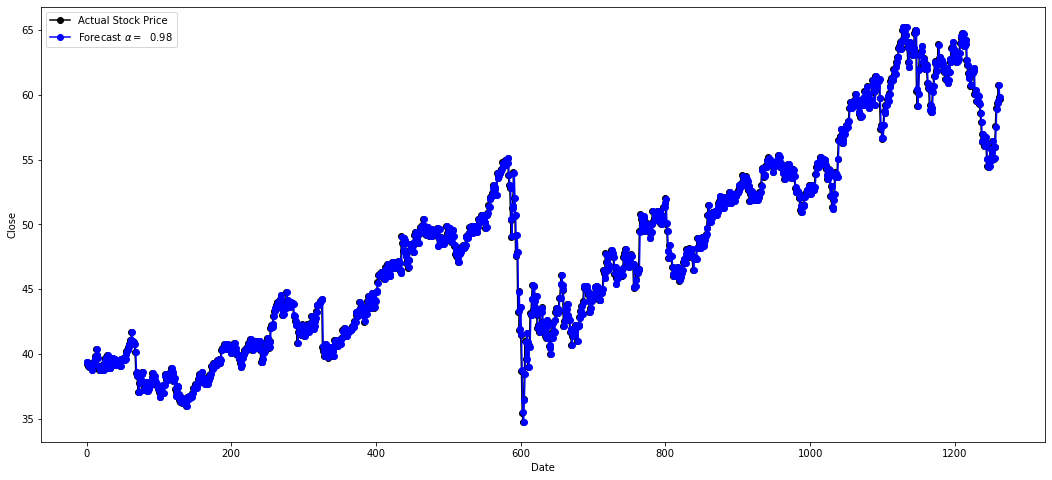

In [62]:
# Insample forecast graph

fig, ax = plt.subplots(figsize = (18, 8), nrows=1, ncols=1)

ax.plot(coke[variable], marker='o', color='black', label = 'Actual Stock Price')
ax.plot(coke['forecast_ses'], marker='o', color='blue', label = fr'Forecast $\alpha =$ {alpha: .2f}')

ax.legend()
plt.ylabel(variable)
plt.xlabel('Date')

Text(0.5, 0, 'Date')

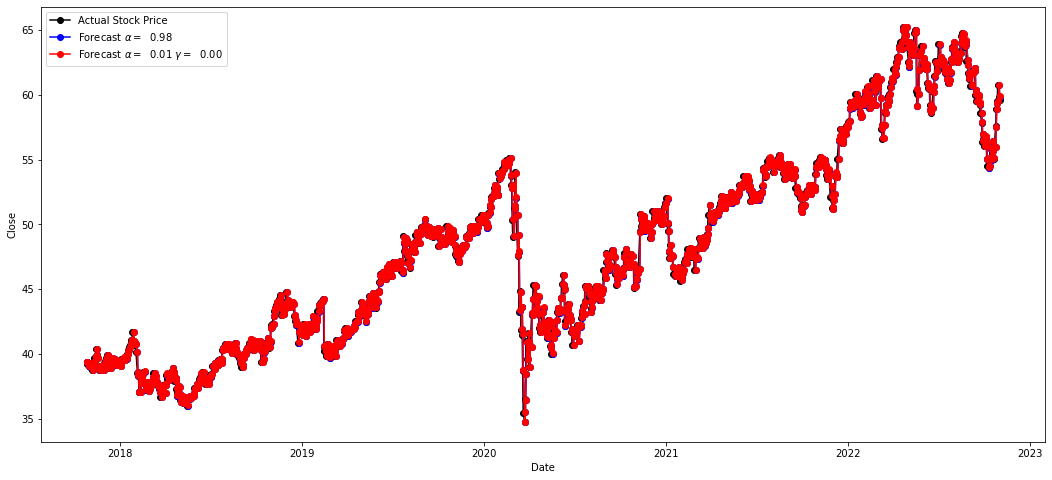

In [64]:
# Outsample forecast graph

fig, ax = plt.subplots(figsize = (18, 8), nrows=1, ncols=1)

ax.plot(coke['Date'], coke[variable], marker='o', color='black', label = 'Actual Stock Price')
ax.plot(coke['Date'], coke['forecast_ses'], marker='o', color='blue', label = fr'Forecast $\alpha =$ {alpha: .2f}')
ax.plot(coke['Date'], coke['des_forecast'], marker='o', color='red', label = fr'Forecast $\alpha =$ {b: .2f} $\gamma =$ {c: .2f}')

ax.legend()
plt.ylabel(variable)
plt.xlabel('Date')

<font color='red' size = '5'> Question 4 </font>

Is there seasonality in the data? If so, how many seasons? How do you know? Do the statistics make any sense theoretically? (if you are uncomfortable interpretting stock data do your best, I will not test you on your asset pricing acumen).

Hint: Writing a loop to test different autocorrelations may be helpful here. 



*Your Answer Here*

In [65]:
coke['error'] = coke[variable] - coke['des_forecast']
coke[['error']].describe()

,error
count,"1,263.00"
mean,-0.00
std,0.65
min,-4.68
25%,-0.26
50%,0.02
75%,0.31
max,2.92


In [92]:
coke['error'].autocorr(6)

# purpose of seasonality is to get rid of autocorrelation (make my errors better). 
# there are 6 periods of seasonality in the data because the autocreelation of 6 is the maximum depth of seasonality that returns the value below the cutoff of 0.056
# if we have 7 periods of seasonaliy in the data, it returns a value beyond the cutoff and indicates that my autocorrelation is too high  

-0.06043205230487939

In [93]:
import math
2/math.sqrt(coke['error'].count())

# my cutoff is 0.056

0.05627666078833527

In [94]:
coke['error'].autocorr(lag=1)
# when lag is 1, we are below the cut off
# lag is looking at every 5 days do stocks tend to move in the same day
# lag is between 1 and 6 in order to stay below the cutoff --> every 1 period to 6 periods, there's a correlation of errors

-0.0008310159913571465

In [96]:
# create loop to check lag result is higer than the cutoff
for i in range (1, 730):
    test = coke['error'].autocorr(i)
    if (test >= 0.05627666078833527):
        print(i, test)

5 0.07910534181503692
7 0.0932793459897788
9 0.07115665543350608
16 0.058052454837081484
66 0.0682022142506
217 0.062135566149995484
296 0.06555342121532796
345 0.06382381285634839
352 0.06107154642913513
362 0.06659566377460464
427 0.07261921164449787
428 0.0796343198905107
435 0.0608451969770313
472 0.0574112854572938
488 0.056349249633355
496 0.09066717395973903
497 0.0990032076876121
524 0.07407128233117673
533 0.07475015855557293
545 0.06607716018225356
546 0.058196138707756806
561 0.058785444761384
562 0.06234768909843554
582 0.06423753809534061
587 0.06014890791479091
596 0.09942723802714984
620 0.07236624854992901
625 0.08825197756961074
636 0.07867079647075859
644 0.09166164731238276
652 0.10335109707036447
689 0.06483459588261359
690 0.06510051894724692
702 0.0760875447310935
715 0.07583944987191275
717 0.061746203393469146
718 0.05822034875647151
724 0.07528983115439512
